Загрузка датасета 20newsgroups

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
news = fetch_20newsgroups(subset='all')

Информация о количественных параметрах датасета и несколько точек датасета

In [3]:
print(f"Тип данных data: {type(news.data)}, Тип данных target: {type(news.target)}, Тип данных target_names: {type(news.target_names)}")
print(f"Размер data: {len(news.data)}")
print(f"Размер target: {len(news.target)}")
print(f"Названия данных таргет: {news.target_names}")
print(f"Пример данных с data: \n{news.data[0]}")
print(f"Пример данных с target: {news.target[0]}, {news.target_names[news.target[0]]}")

Тип данных data: <class 'list'>, Тип данных target: <class 'numpy.ndarray'>, Тип данных target_names: <class 'list'>
Размер data: 18846
Размер target: 18846
Названия данных таргет: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Пример данных с data: 
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going 

Разделение данных на тестовую и обучающую выборки

In [4]:
split_size = int(len(news.data)*0.75)
X_train = news.data[:split_size]
X_test = news.data[split_size:]
y_train = news.target[:split_size]
y_test = news.target[split_size:]

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn import metrics

Векторизируем текст

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)

Построение модели наивного байесовского для классификации текстов и обучение

In [7]:
model = MultinomialNB().fit(X, y_train)

Оценка качества модели на тестовой выборке

In [8]:
X_test_vec = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vec)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       216
           1       0.61      0.85      0.71       246
           2       0.94      0.12      0.21       274
           3       0.61      0.85      0.71       235
           4       0.89      0.87      0.88       231
           5       0.75      0.90      0.82       225
           6       0.88      0.68      0.77       248
           7       0.90      0.88      0.89       275
           8       0.94      0.94      0.94       226
           9       0.97      0.94      0.96       250
          10       0.97      0.98      0.98       257
          11       0.87      0.98      0.92       261
          12       0.85      0.86      0.85       216
          13       0.90      0.92      0.91       257
          14       0.91      0.93      0.92       246
          15       0.81      0.95      0.87       234
          16       0.82      0.94      0.88       218
          17       0.90    

In [9]:
matrix = metrics.confusion_matrix(y_test, y_pred)

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


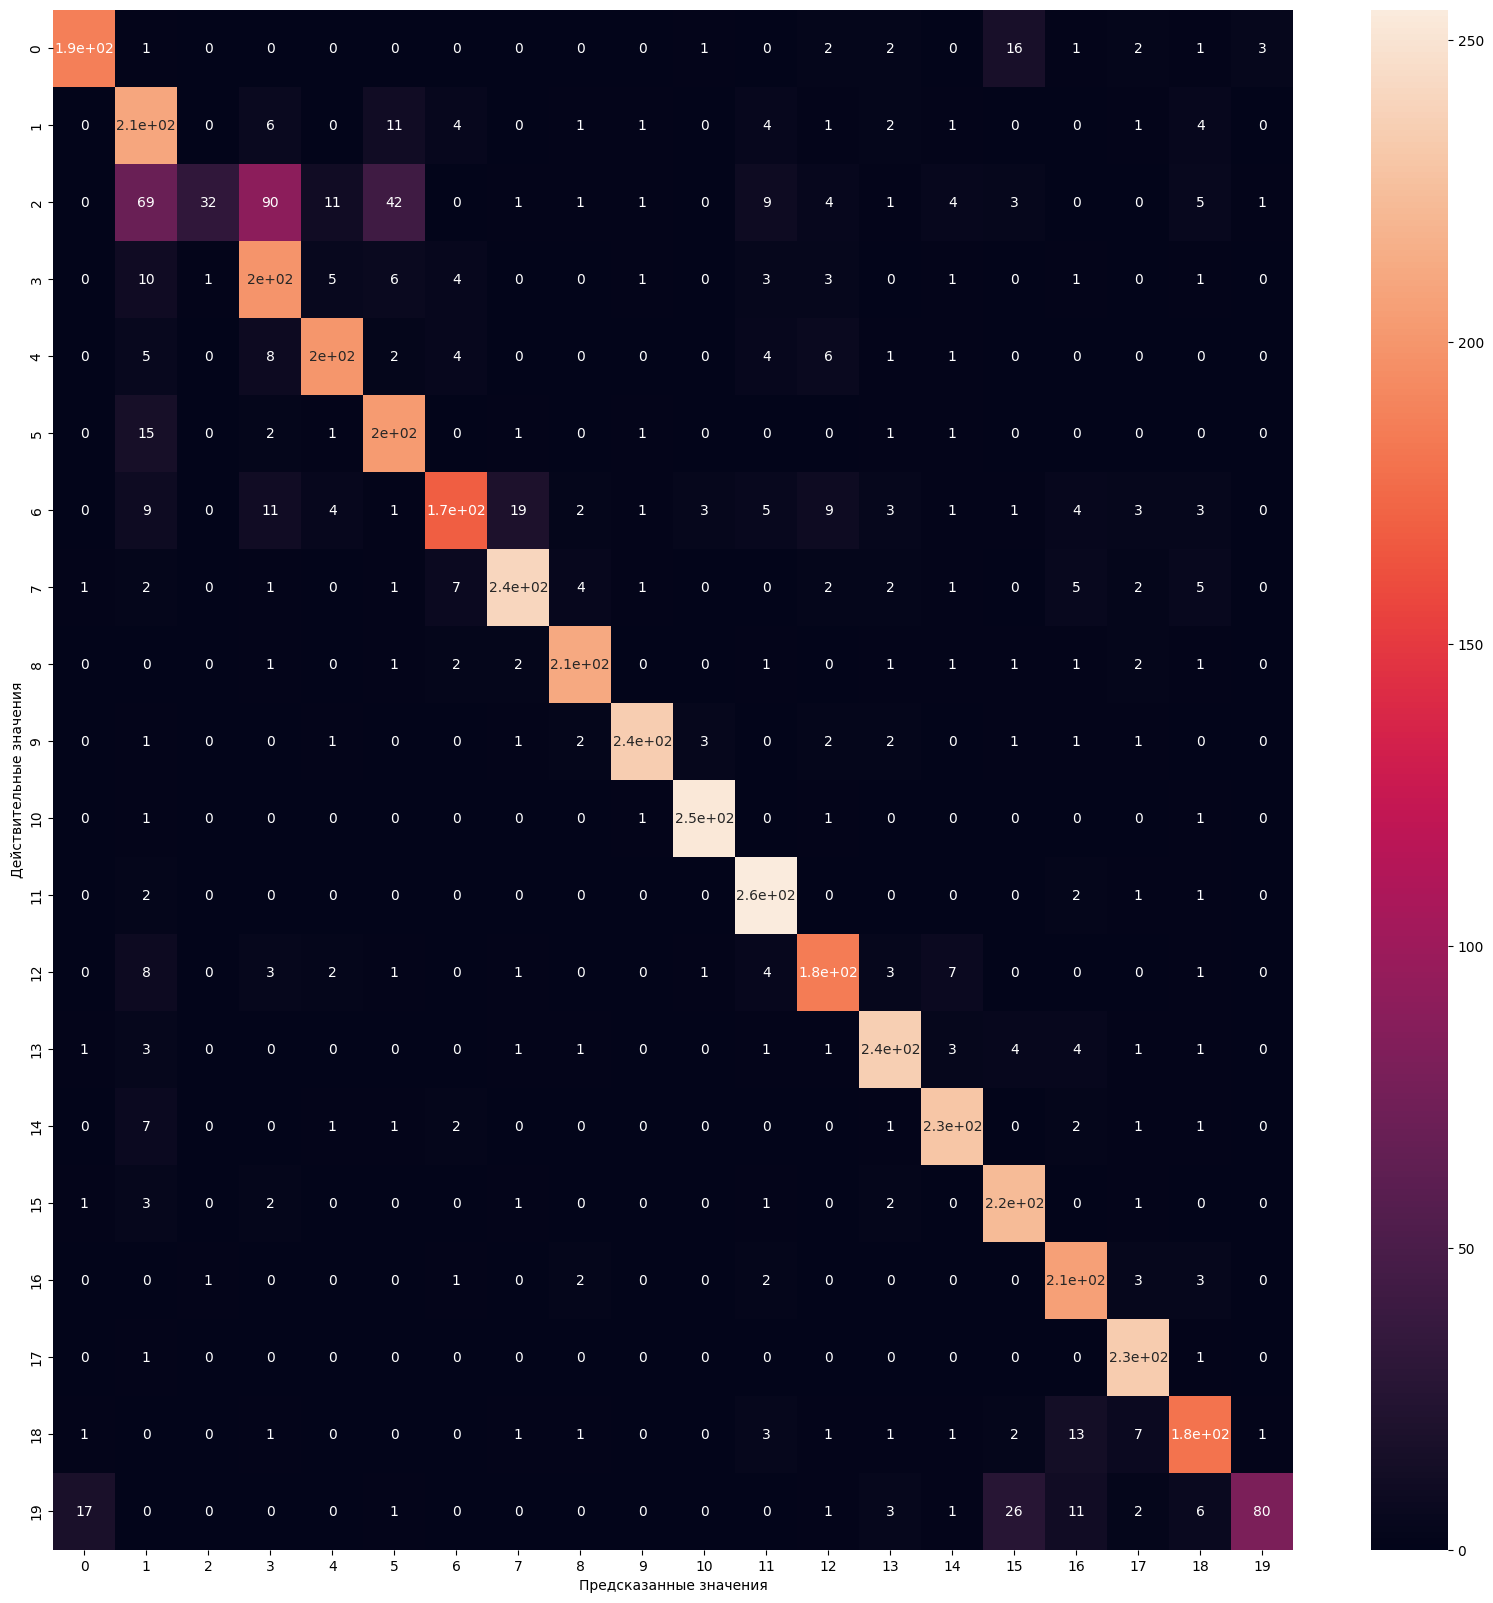

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pd.DataFrame(matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

Построение кривой обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки

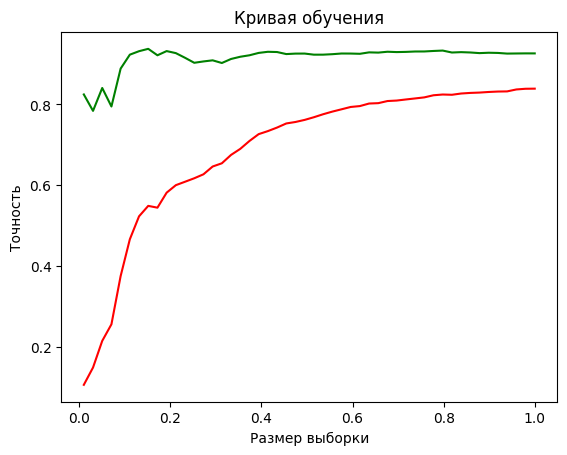

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve

size_grid = np.linspace(0.01, 1.0, 50)

train_size,train_scores,validation_scores = learning_curve(MultinomialNB(), X, y_train, train_sizes = size_grid, cv = 5)

plt.figure()
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'green')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'red')
plt.title('Кривая обучения')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.show()

# Вывод:
Точность классификации составляет порядка 80 процентов, что является неплохим показателем для задачи анализа текстов.
Данную модель можно успешно использовать